<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Passengers_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import kpss

In [2]:
passengers = pd.read_csv('https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/Dataset/passengers_in.csv')


In [3]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1350 non-null   int64 
 1   Date           1350 non-null   object
 2   Region1        1350 non-null   object
 3   Nb_passengers  1350 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.3+ KB


In [4]:
passengers_pt = passengers[(passengers['Region1']=='Portugal')]

In [5]:
passengers_pt['Date'] = passengers_pt['Date'].str.replace(' de ', '/')
passengers_pt[['Month', 'Year']] = passengers_pt['Date'].str.split('/',1,expand=True)
passengers_pt

<ipython-input-5-313d4ddc64f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers_pt['Date'] = passengers_pt['Date'].str.replace(' de ', '/')
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Date,Region1,Nb_passengers,Month,Year
0,6,Setembro/2022,Portugal,2916061,Setembro,2022
6,12,Agosto/2022,Portugal,3082908,Agosto,2022
12,18,Julho/2022,Portugal,3232882,Julho,2022
18,24,Junho/2022,Portugal,2878124,Junho,2022
24,30,Maio/2022,Portugal,2700017,Maio,2022
...,...,...,...,...,...,...
1320,1326,Maio/2004,Portugal,984004,Maio,2004
1326,1332,Abril/2004,Portugal,959687,Abril,2004
1332,1338,Março/2004,Portugal,714792,Março,2004
1338,1344,Fevereiro/2004,Portugal,630012,Fevereiro,2004


In [6]:
months = {'Janeiro':'01', 'Fevereiro':'02', 'Março':'03', 'Abril':'04', 'Maio':'05', 'Junho':'06', 'Julho':'07', 'Agosto':'08', 'Setembro':'09', 'Outubro':10, 'Novembro':11, 'Dezembro':12}

df2=passengers_pt.replace({"Month": months}) #convert the name to number of month
df2['Year'] = df2['Year'].astype(str)
df2['Month'] = df2['Month'].astype(str)
df2['Date'] = df2['Month']+df2['Year']

passenger_pt2 = df2[['Date', 'Nb_passengers']]

passenger_pt2['Date'] = pd.to_datetime(passenger_pt2['Date'], format='%m%Y')
passenger_pt2
#passenger_pt2.set_index('Date')

<ipython-input-6-0bec280ca4dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_pt2['Date'] = pd.to_datetime(passenger_pt2['Date'], format='%m%Y')


,Date,Nb_passengers
0,2022-09-01,2916061
6,2022-08-01,3082908
12,2022-07-01,3232882
18,2022-06-01,2878124
24,2022-05-01,2700017
...,...,...
1320,2004-05-01,984004
1326,2004-04-01,959687
1332,2004-03-01,714792
1338,2004-02-01,630012


In [7]:
passengers_landed_PT = passenger_pt2[passenger_pt2['Date']>'2016-12-31'].sort_values(by='Date', ascending=True).set_index('Date')
passengers_landed_PT

,Nb_passengers
Date,
2017-01-01,1396458
2017-02-01,1473431
2017-03-01,1794413
2017-04-01,2319712
2017-05-01,2427139
...,...
2022-05-01,2700017
2022-06-01,2878124
2022-07-01,3232882


In [8]:
#passengers_landed_PT.to_csv('passengers_landed_PT.csv') ## for correlatio check

In [9]:
passengers_landed_PT['Nb_passengers'] = passengers_landed_PT['Nb_passengers'].astype(int)

In [10]:
passengers_landed_PT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2017-01-01 to 2022-09-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nb_passengers  69 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


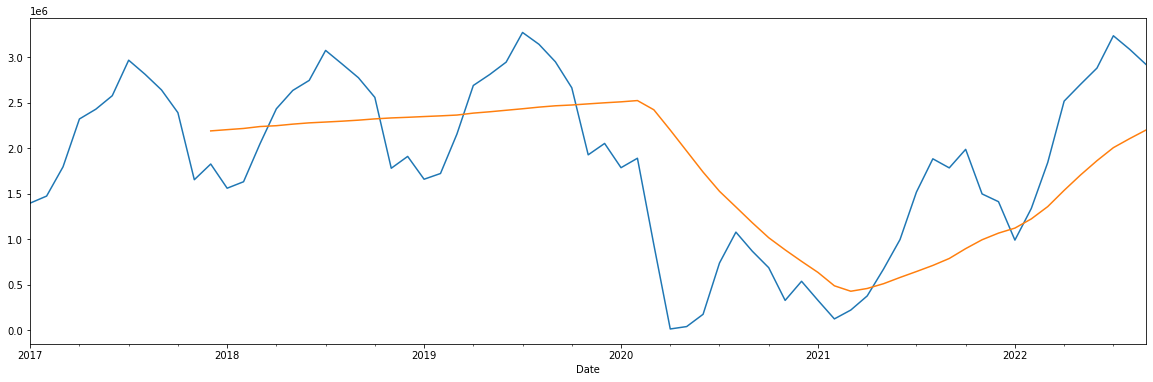

In [11]:
#fig, ax = plt.subplots(figsize = (20,6))
passengers_landed_PT['Nb_passengers'].plot(figsize = (20,6))
passengers_landed_PT['Nb_passengers'].rolling(12).mean().plot(figsize = (20,6))
#ax.set_xticks(np.arange(2017-01-01, 2022-09-01, 5))

<ipython-input-13-c3b5af9719de>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(x = passengers_landed_PT['Nb_passengers'].rolling(12).mean().dropna(), freq = 2, model='additive')


[]

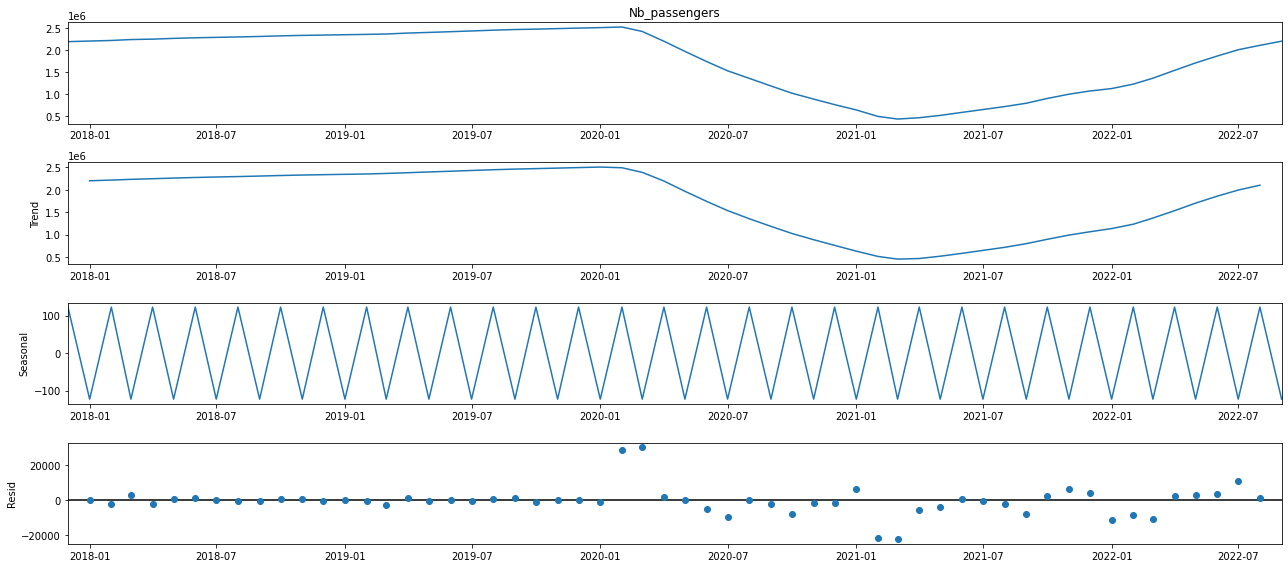

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
# sig = furniture['Sales'].resample('W').sum()
# decomposition = sm.tsa.seasonal_decompose(x = furniture['Sales'].rolling(30).mean().dropna(), freq = 12, model='additive')
decomposition = sm.tsa.seasonal_decompose(x = passengers_landed_PT['Nb_passengers'].rolling(12).mean().dropna(), freq = 2, model='additive')
fig = decomposition.plot()
plt.plot()

<ipython-input-29-6cee5c157215>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_ = sm.tsa.seasonal_decompose(x = ((passengers_landed_PT['Nb_passengers'].rolling(12).mean().dropna()) - decomposition.seasonal).dropna(), freq = 2, model='additive')


[]

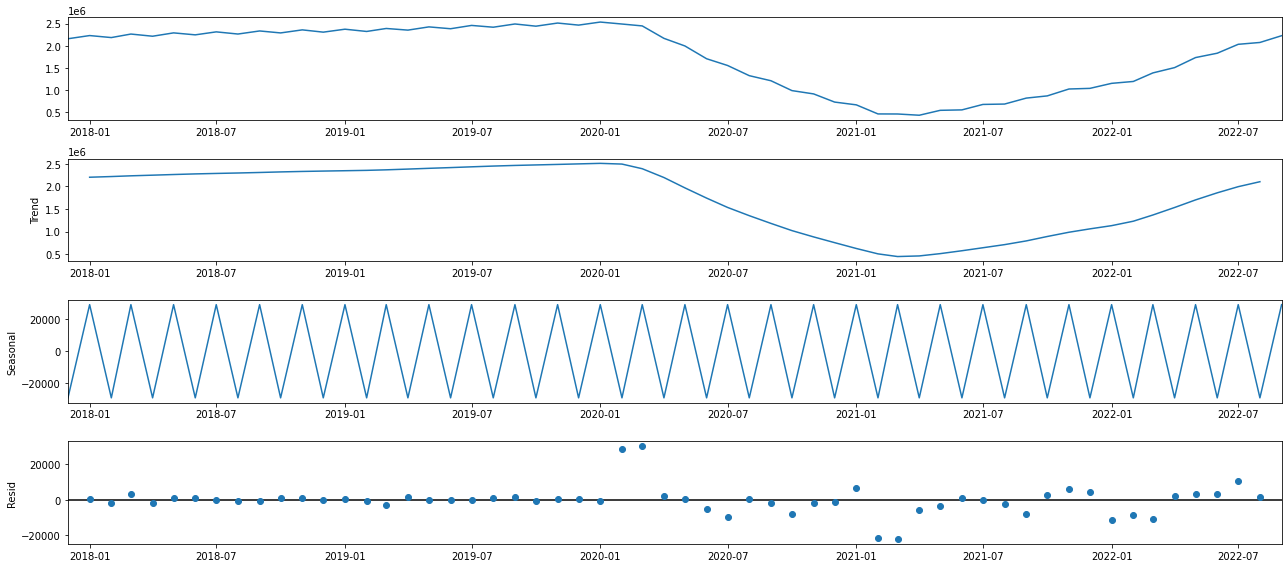

In [29]:
decomposition_ = sm.tsa.seasonal_decompose(x = ((passengers_landed_PT['Nb_passengers'].rolling(12).mean().dropna()) - decomposition.seasonal).dropna(), freq = 2, model='additive')
fig = decomposition_.plot()
plt.plot()

<ipython-input-25-dfaacbc76ae5>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition1 = sm.tsa.seasonal_decompose(x = passengers_landed_PT['Nb_passengers'], freq = 2, model='additive')


[]

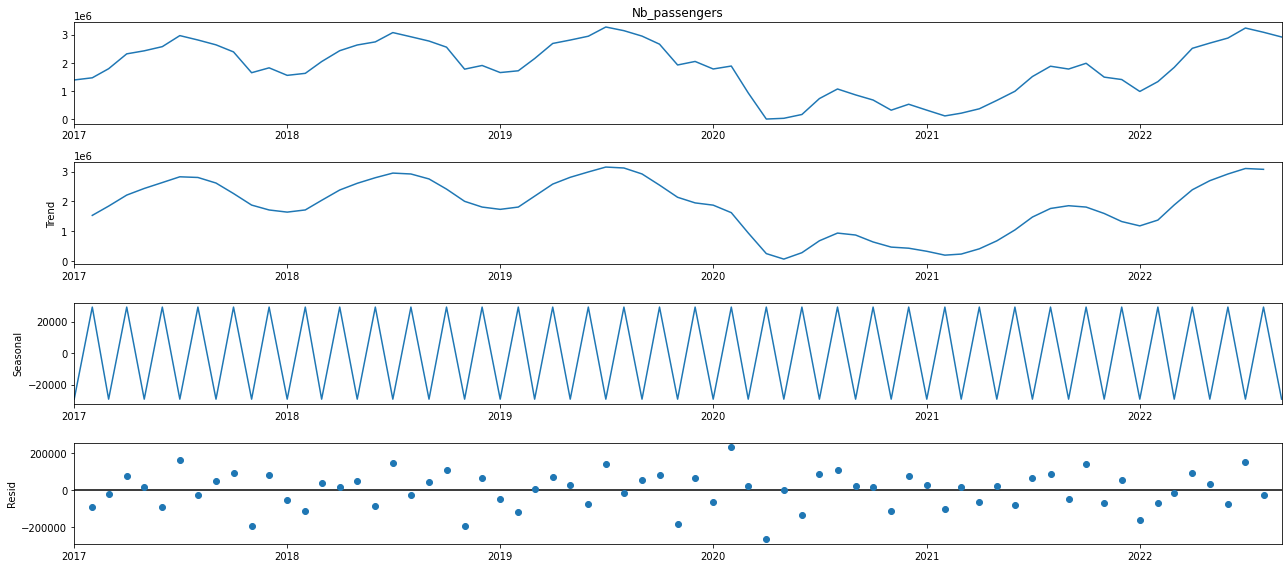

In [25]:
decomposition1 = sm.tsa.seasonal_decompose(x = passengers_landed_PT['Nb_passengers'], freq = 2, model='additive')
fig = decomposition1.plot()
plt.plot()

<ipython-input-30-c4b7609cb008>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition2 = sm.tsa.seasonal_decompose(x = (passengers_landed_PT['Nb_passengers'] - decomposition.seasonal).dropna(), freq = 2, model='additive')


[]

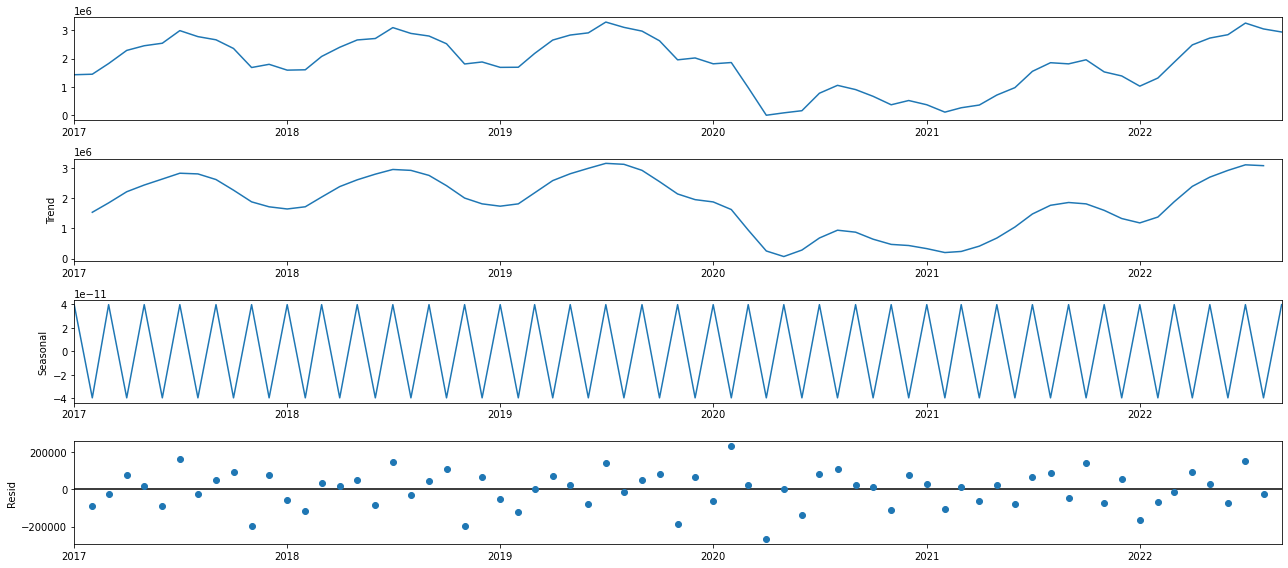

In [30]:
decomposition2 = sm.tsa.seasonal_decompose(x = (passengers_landed_PT['Nb_passengers'] - decomposition.seasonal).dropna(), freq = 2, model='additive')
fig = decomposition2.plot()
plt.plot()

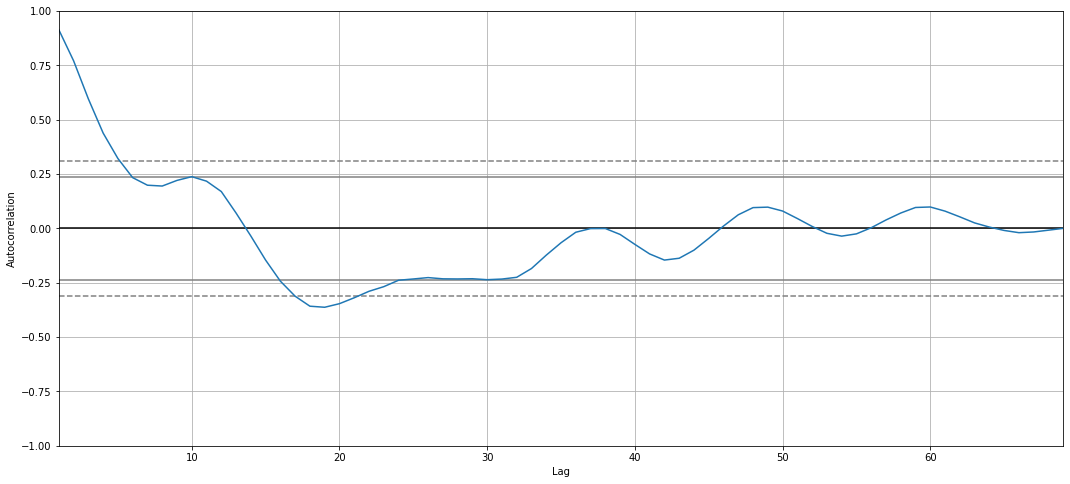

In [18]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(passengers_landed_PT['Nb_passengers'])
plt.show()

In [19]:
passengers_landed_PT['Nb_passengers'].autocorr()

0.924379053503054

In [20]:
kpss(passengers_landed_PT['Nb_passengers'], regression='c', nlags = 'auto')
# if p > alpha -> we cannot reject the null hyp -> we failed to demonstrate the time series is non-stat

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2850766405766848,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
kpss(passengers_landed_PT['Nb_passengers'], regression='ct', nlags = 'auto')
# if p > alpha -> we cannot reject the null hyp -> we failed to demonstrate the time series is non-stat

(0.13726424734688458,
 0.0661773197279915,
 5,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})